In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
RAND = 10

Клиенты разделены на сегменты, внутри которых они схожи в определенных аспектах таких как: пол, возраст, семейное положение и т.д.

Сегментация клиентов-это практика разделения клиентской базы на группы людей, которые схожи в определенных аспектах, имеющих отношение к маркетингу, таких как возраст, пол, интересы и привычки к расходам.

Необходимо преобразовать признаки и обучить модель для определения к какому сегменту будут относиться новые люди, а также вывести топ-фичи для каждого сегмента

# Загрузка и первичный анализ данных

1) Прочитать файл customer_segmentation.csv и записать в переменную df

In [22]:
df = pd.read_csv('customer_segmentation.csv')

2) Вывести первые пять строк

In [23]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


3) Выведите размер датасета

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


4) Вывести общую информацию о датафрейме при помощи метода info()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


5) Проанализировать кол-во пропусков, а также посмотреть сколько это в процентах от размера датасета (кол-ва строк)

In [27]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


6) Вывести основные описательные статистики для числовых признаков

In [28]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [29]:
df.iloc[:,1:].describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


7) Вывести основные описательные статистики для категориальных признаков

In [30]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


# Exploratory Data Analysys

8) Посчитайте **в процентах** сколько клиентов в каждом из сегментом Segmentation и визуализируйте при помощи barplot. 

Чтобы отобразить числа над можете прописать следующий код:

In [31]:
ax = plt.figure(figsize=(10,6))

segment_values = df.Segmentation.value_counts(normalize=True)



# внутри можно ничего не менять
for p in ax.patches:
    ax.annotate(format(p.get_height()*100, '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 4),
                   textcoords='offset points')
    ax = sns.barplot(segment_values)

# Выведите также наименование графика и подписи по осям при помощи title и других методов из matplolib
# Ваш код

<Figure size 1000x600 with 0 Axes>

9) Отобразите график **распределения возраста (seaborn.displot) в разрезе сегмента**. Не забывайте про common_norm=False. 

**Какие выводы вы можете сделать? напишите кратко**

C:\Users\maxim\AppData\Local\Temp\ipykernel_1840\2540482260.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(segment_values)


<Axes: xlabel='Segmentation', ylabel='Density'>

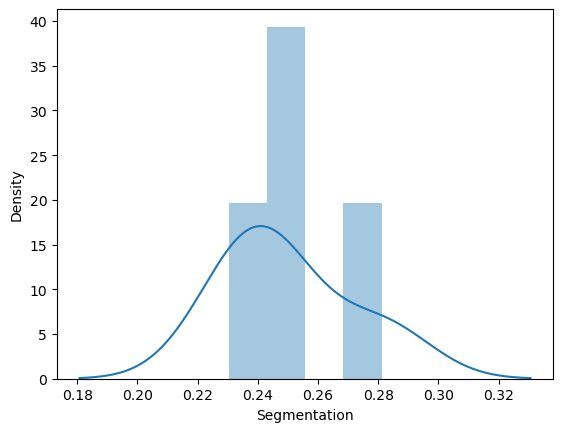

In [32]:
import seaborn as sns
sns.distplot(segment_values)

10) Отобразите **график распределения возраста в разрезе пола**. Не забывайте про common_norm=False.

**Какие выводы вы можете сделать? напишите кратко**

In [1]:
#sns.lineplot(data=df.groupby('Gender'))

11) Отобразите на графике долю людей (ось OY) в разрезе пола (ось OX) по каждому сегменту (hue).

- Данные должны быть **нормированы** на  кол-во людей в каждом из сегментов, **пример был в ноутбке по EDA анализу**.

- Не забудьте указать цифры (%) на графике для каждого бара, как это делалось ранее. 

Например, если в сегменте А всего 120 людей, мужчин 20, а женщин 100, то тогда мужчин - 16,7%, женщин 83,3%

**Какие выводы вы можете сделать? напишите кратко**

12) Отобразите на графике долю людей (ось OY) в разрезе профессии Profession (ось OX) по каждому сегменту (hue).

- Данные должны быть **нормированы** на  кол-во людей в каждом из сегментов, **пример был в ноутбке по EDA анализу**.

- Не забудьте указать цифры (%) на графике для каждого бара, как это делалось ранее. 

**Какие выводы вы можете сделать? напишите кратко**

13) Отобразите на графике долю людей (ось OY) в разрезе образования Graduated (ось OX) по каждому сегменту (hue).

- Данные должны быть **нормированы** на  кол-во людей в каждом из сегментов, **пример был в ноутбке по EDA анализу**.

- Не забудьте указать цифры (%) на графике для каждого бара, как это делалось ранее. 

**Какие выводы вы можете сделать? напишите кратко**

14) Отобразите график **распределения опыта работы в разрезе от сегмента**. Не забывайте про common_norm=False.

**Какие выводы вы можете сделать? напишите кратко**

15) Отобразите график, на котором бы вы сравнили среднее значение (медианное) опыта работы в разрезе сегментов. 

**Какие выводы вы можете сделать? напишите кратко**

16) Отобразите на графике долю людей (ось OY) в разрезе Spending_Score (ось OX) по каждому сегменту (hue).

- Данные должны быть **нормированы** на  кол-во людей в каждом из сегментов, **пример был в ноутбке по EDA анализу**.

- Не забудьте указать цифры (%) на графике для каждого бара, как это делалось ранее. 

**Какие выводы вы можете сделать? напишите кратко**

16) Отобразите скрипичную диаграмму (seaborn.violinplot) кол-ва членов в семье Family_Size (ось OY) в разрезе сегментов (ось OX)

**Какие выводы вы можете сделать? напишите кратко**

17) **Заполнение пропусков**

Заполните пропуски в признаках при помощи **группировки по Age**:
- модой для признаков Ever_Married, Graduated, Profession, Var_1
- медианой для признаков Work_Experience, Family_Size.

Подсказки:
- dataset[column].fillna(dataset.groupby('Age')[column].transform(function)

- Как подставить моду в transform: transform(lambda x: x.mode()[0])

18) Проверьте, остались ли пропуски в данных

19) Построить heatmap и посмотреть на корреляцию признаков, что можно отметить?

# Feature engineering

20) Закодировать признаки **Ever_Married, Graduated, Spending_Score** при помощи цифр.

учесть, что например такой признак как Spending_Score имеет нарастающие значения Low, Average, High

# Modeling

21) Разбиение данных на тренировочные тестовые

- Удалить столбец ID
- Преобразовать категориальные признаки в бинарный вид (pandas.get_dummies(drop_first=True))
- Стандартизуйте данные (не забываем, что fit_transform для train и transform для test)
- Закодировать целевую переменную Segmentation при помощи LabelEncoder()
- Разделить выборку на train и test данные, используя стратификацию stratify, где test_size=0.2, а также RAND как random_state
- Чтобы потом использовать roc_auc_score не забывайте про label_binarize() - пример был в лекции

22) Обучите в качестве baseline логистическую регрессию, использовав метод из sklearn **каждый против каждого, зафиксируйте только random_state=RAND**

23) Выведите матрицу ошибок в **одной строке (2 графика в одной строке в двух столбцах)** используя функцию plot_confusion_matrix() для train и test (пример в лекции).

Не забывайте, что при выводе на графике исходных значений сегментов в буквенном варианте, необходимо сделать инвертирование inverse_transform()

24) Какие результаты по основным метрикам вы получили на test? Что можно сказать про модель?

Запишите результат в переменную metrics, используя функцию как в лекции ниже

Может ли она разделять классы?

In [28]:
def get_metrics_multiclass(y_test_bin, y_test, y_pred, y_prob, name,
                           type_multi):
    """
    y_test_bin - бинаризованные тестовые метки класса
    y_test - метки класса без бинаризации
    y_prob - предсказанные вероятности классов
    name - название модели/подхода
    type_multi - тип многоклассовой классификации для ROC-AUC (ovo/ovr)
    """

    df_metrics = pd.DataFrame()

    df_metrics['model'] = [name]

    df_metrics['ROC_AUC'] = roc_auc_score(y_test_bin,
                                          y_prob,
                                          multi_class=type_multi)
    df_metrics['Precision_micro'] = precision_score(y_test,
                                                    y_pred,
                                                    average='micro')
    df_metrics['Precision_macro'] = precision_score(y_test,
                                                    y_pred,
                                                    average='macro')
    df_metrics['Recall_micro'] = recall_score(y_test, y_pred, average='micro')
    df_metrics['Recall_macro'] = recall_score(y_test, y_pred, average='macro')
    df_metrics['F1_micro'] = f1_score(y_test, y_pred, average='micro')
    df_metrics['F1_macro'] = f1_score(y_test, y_pred, average='macro')
    df_metrics['Logloss'] = log_loss(y_test, y_prob)

    return df_metrics

## RandomizedSearch

25) Найдите параметры для LogisticRegression при помощи подхода **каждый против каждого**, используя StratifiedKFold с 3 фолдами, при помощи **RandomizedSearchCV**

- Метрика для поиска параметров scoring = 'f1_macro'
- Не забывайте фиксировать random_state в StratifiedKFold, а также при поиске гиперпараметров

26) Выведите наилучшие значения метрик и параметры после обучения RandomizedSearchCV

27) Какие результаты по основным метрикам вы получили на test? Запишите результат в переменную metrics, используя ранее  функцию get_metrics_multiclass()

Есть ли улучшения по сравнения с baseline (предыдущее обучение без подбора параметров)? 

**Если вы получили f1_macro меньше 0.487, то нужно тщательнее подобрать параметры для RandomizedSearchCV**

28) Выведите матрицу ошибок в **одной строке (2 графика в одной строке в двух столбцах)** plot_confusion_matrix для train и test.

- Не забывайте, что при выводе на графике исходных значений сегментов в буквенном варианте, необходимо сделать инвертирование inverse_transform()
- Сделайте сравнение при помощи subplots матрицы ошибок для baseline и поиска по сетке, подпишите названия каждого графика использовать массив осей (ax)

29) **Важность признаков**

- Необходимо найти веса для каждого из признаков, использовав обученные модели при помощи RandomizedSearchCV в прошлом задании
- Для вывода наилучшей модели использовать grid_cv.best_estimator_.estimators_
- Чтобы получить веса, например, для модели под индексом 0: grid_cv.best_estimator_.estimators_[i].coef_[0]
- Записать в новый датафрейм **feature_importance** названия признаков и соответствующее усредненное значение веса: 
    - столбец **feature** - название признака
    - столбец **value** - среднее значение веса для этого признака и отсортировать по убыванию

- Подсказка:

Ко-во классификаторов для OVO  всегда четное 𝐾=𝑁(𝑁−1)/2. Поэтому необходимо усреднить значения весов по всем классификаторам.

In [ ]:
# Ваш код